# Predicting personal financial distress

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

credit = pd.read_csv("cleaned.csv")
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingMonthlyIncome,MissingNumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,1,1
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,1,1
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,1,1
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,1,1
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,1,1
5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0,1,1
6,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.0,0,1
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0,1,1
8,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.0,0,0
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0,1,1


In [2]:
# Perform log transformation on MonthlyIncome
credit["MonthlyIncome"] = credit["MonthlyIncome"] + 1
credit["MonthlyIncome"] = np.log(credit["MonthlyIncome"])
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingMonthlyIncome,MissingNumberOfDependents
0,1,0.766127,45,2,0.802982,9.118335,13,0,6,0,2.0,1,1
1,0,0.957151,40,0,0.121876,7.863651,4,0,0,0,1.0,1,1
2,0,0.658180,38,1,0.085113,8.020599,2,1,0,0,0.0,1,1
3,0,0.233810,30,0,0.036050,8.101981,5,0,0,0,0.0,1,1
4,0,0.907239,49,1,0.024926,11.060196,7,0,1,0,0.0,1,1
5,0,0.213179,74,0,0.375607,8.160804,3,0,1,0,1.0,1,1
6,0,0.305682,57,0,5710.000000,8.805558,8,0,3,0,0.0,0,1
7,0,0.754464,39,0,0.209940,8.160804,8,0,0,0,0.0,1,1
8,0,0.116951,27,0,46.000000,8.805558,2,0,0,0,0.0,0,0
9,0,0.189169,57,0,0.606291,10.072597,9,0,4,0,2.0,1,1


### Prepare train and test set

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

X_train = train_set.drop('SeriousDlqin2yrs', axis=1)
Y_train = train_set['SeriousDlqin2yrs']

X_test = test_set.drop('SeriousDlqin2yrs', axis=1)
Y_test = test_set['SeriousDlqin2yrs']

X = credit.drop('SeriousDlqin2yrs', axis=1)
Y = credit['SeriousDlqin2yrs']

### Stochastic Gradient Descent (SGD) Model

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=10, tol=None, random_state=22)

# Train the model using the train set
sgd.fit(X_train, Y_train)
sgd.intercept_, sgd.coef_

(array([136.24833941]),
 array([[-4.18115636e+01, -3.99670605e-01,  1.09160034e+01,
         -6.27370078e+00, -1.11523389e+01, -3.20343524e-14,
          1.28560711e+01,  3.88846193e+00, -2.20068627e+01,
          2.53957363e+00, -9.98343865e+00, -9.43389157e+00]]))

To evaluate our SGD classifier, we compute the accuracy score, the confusion matrix, perform a cross validation with 5 folds, plot the ROC, and compute the ROC area under the curve.

In [6]:
# Predict the train set 
Y_train_pred = sgd.predict(X_train)

# Compute accuracy score
from sklearn import metrics
metrics.accuracy_score(Y_train, Y_train_pred)

0.6809640080334003

In [7]:
# Construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_train_pred)

array([[79404, 32528],
       [ 5756,  2311]])

In [8]:
pd.crosstab(Y_train, Y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,79404,32528,111932
1,5756,2311,8067
All,85160,34839,119999


In [9]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_train_pred))

             precision    recall  f1-score   support

          0       0.93      0.71      0.81    111932
          1       0.07      0.29      0.11      8067

avg / total       0.87      0.68      0.76    119999



In [10]:
# Perform cross validation and compute accuracy score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X, Y, cv=5)

array([0.86103797, 0.92503333, 0.93276667, 0.9138638 , 0.88306277])

In [11]:
from sklearn.model_selection import cross_val_predict
Y_train_cv_pred = cross_val_predict(sgd, X_train, Y_train, cv=5)

In [12]:
confusion_matrix(Y_train, Y_train_cv_pred)

array([[103409,   8523],
       [  6869,   1198]])

In [13]:
pd.crosstab(Y_train, Y_train_cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,103409,8523,111932
1,6869,1198,8067
All,110278,9721,119999


In [14]:
print(classification_report(Y_train,Y_train_cv_pred))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93    111932
          1       0.12      0.15      0.13      8067

avg / total       0.88      0.87      0.88    119999



In [16]:
# Compute false positive rate, true positive rate, and thresholds
from sklearn.metrics import roc_curve

Y_pred_proba = cross_val_predict(sgd, X_train, Y_train, cv=5, method="decision_function")
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(Y_train, Y_pred_proba)

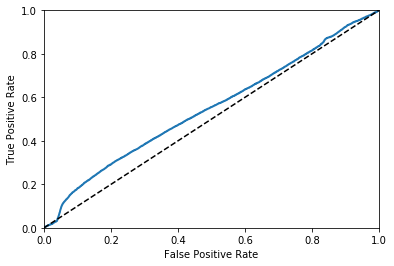

In [17]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

In [18]:
# Compute area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_pred_proba)

0.5480004708848071

### K-Nearest Neighbors (KNN) Model 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the train set
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

To evaluate our KNN classifier, we compute the accuracy score, the confusion matrix, perform a cross validation with 5 folds, plot the ROC, and compute the ROC area under the curve.

In [18]:
# Predict the train set 
Y_train_pred = knn.predict(X_train)

# Compute accuracy score
metrics.accuracy_score(Y_train, Y_train_pred)

0.9415411795098293

In [19]:
# Construct the confusion matrix
confusion_matrix(Y_train, Y_train_pred)

array([[111420,    512],
       [  6503,   1564]])

In [20]:
pd.crosstab(Y_train, Y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111420,512,111932
1,6503,1564,8067
All,117923,2076,119999


In [21]:
# Classification Report
print(classification_report(Y_train,Y_train_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97    111932
          1       0.75      0.19      0.31      8067

avg / total       0.93      0.94      0.93    119999



In [22]:
# Perform cross validation and compute accuracy score
cross_val_score(knn, X, Y, cv=5)

array([0.93326889, 0.93216667, 0.93326667, 0.93386446, 0.93343111])

In [23]:
Y_train_cv_pred = cross_val_predict(knn, X_train, Y_train, cv=5)

In [24]:
confusion_matrix(Y_train, Y_train_cv_pred)

array([[111052,    880],
       [  7138,    929]])

In [25]:
pd.crosstab(Y_train, Y_train_cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111052,880,111932
1,7138,929,8067
All,118190,1809,119999


In [26]:
print(classification_report(Y_train,Y_train_cv_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97    111932
          1       0.51      0.12      0.19      8067

avg / total       0.91      0.93      0.91    119999



In [27]:
# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = knn.predict_proba(X_train)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, Y_pred_proba)

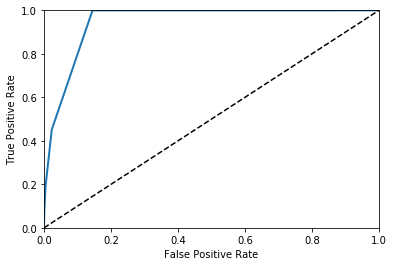

In [28]:
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

In [29]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.9500715679831485

Hyperparameter tuning with Grid Search:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

In [69]:
from sklearn.model_selection import GridSearchCV

# The parameter to be tuned in KNN Classifier is n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}

In [70]:
knn = KNeighborsClassifier()
# knn_gs = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
knn_gs = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, error_score='f1')
knn_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='f1',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
knn_gs.best_score_

0.9351744597871648

In [71]:
knn_gs.best_params_

{'n_neighbors': 19}

In [72]:
knn_tuned = KNeighborsClassifier(n_neighbors=19)
knn_tuned.fit(X_train, Y_train)

# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = knn_tuned.predict_proba(X_train)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, Y_pred_proba)

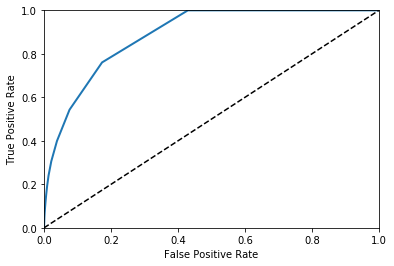

In [73]:
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

In [74]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.8873478999701341

### Decision Tree (DT) Model 

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

# Train the model using the train set
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To evaluate our Decision Tree classifier, we compute the accuracy score, the confusion matrix, perform a cross validation with 5 folds, plot the ROC, and compute the ROC area under the curve.

In [21]:
# Predict the train set 
Y_train_pred = dt.predict(X_train)

# Compute accuracy score
from sklearn import metrics
metrics.accuracy_score(Y_train, Y_train_pred)

0.9996916640972008

In [22]:
confusion_matrix(Y_train, Y_train_pred)

array([[111930,      2],
       [    35,   8032]])

In [23]:
pd.crosstab(Y_train, Y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111930,2,111932
1,35,8032,8067
All,111965,8034,119999


In [24]:
print(classification_report(Y_train,Y_train_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    111932
          1       1.00      1.00      1.00      8067

avg / total       1.00      1.00      1.00    119999



In [25]:
cross_val_score(dt, X, Y, cv=5)

array([0.89743675, 0.89876667, 0.89786667, 0.8969299 , 0.89806327])

In [26]:
Y_train_cv_pred = cross_val_predict(dt, X_train, Y_train, cv=5)

In [28]:
confusion_matrix(Y_train, Y_train_cv_pred)

array([[105402,   6530],
       [  5755,   2312]])

In [29]:
pd.crosstab(Y_train, Y_train_cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,105402,6530,111932
1,5755,2312,8067
All,111157,8842,119999


In [30]:
print(classification_report(Y_train,Y_train_cv_pred))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94    111932
          1       0.26      0.29      0.27      8067

avg / total       0.90      0.90      0.90    119999



In [31]:
# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = dt.predict_proba(X_train)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_train, Y_pred_proba)

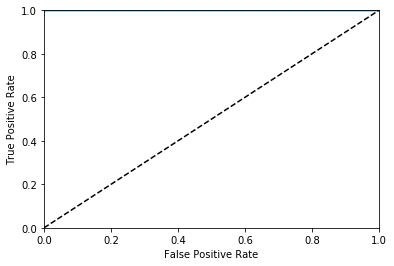

In [32]:
plot_roc_curve(fpr_dt, tpr_dt)
plt.show()

In [33]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.9999990093641874

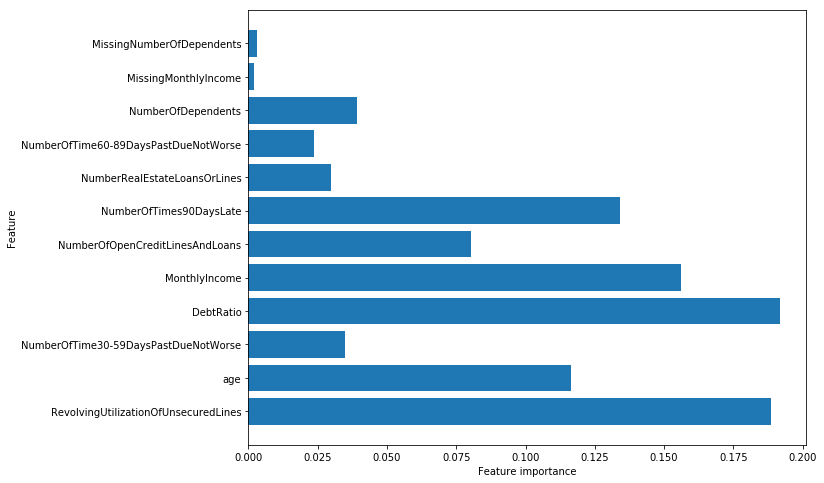

In [34]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dt)

Fine tune hyperparameters

In [37]:
param_grid = {"max_depth": [3, 5, 10, 15, 20],
              "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
             }

In [38]:
dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, error_score='f1')
dt_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='f1',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 10, 15, 20], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
dt_gs.best_score_

0.9365911382594855

In [40]:
dt_gs.best_params_

{'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [68]:
dt_tuned = DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_leaf=4, min_samples_split=5)
dt_tuned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
cross_val_score(dt_tuned, X, Y, cv=5)

array([0.93516883, 0.93506667, 0.93536667, 0.9368979 , 0.93676456])

In [71]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

In [72]:
random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=5,shuffle=False)

In [82]:
# from sklearn.cross_validation import KFold

# kf = KFold(n=len(Y_train), n_folds=10)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0,1,100)

# for i, (train, test) in enumerate(kf):
#     dt.fit(X_train[train], Y_train[train])
#     Y_pred_proba = dt.predict_proba(X_train[train])[:,1]
#     fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_train, Y_pred_proba)
#     tprs.append(interp(mean_fpr, fpr_dt, tpr_dt))
#     roc_auc = auc(fpr_dt, tpr_dt)
#     aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))


# plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
# mean_tpr = np.mean(tprs, axis=0)
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, color='blue',
#          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.legend(loc="lower right")
# plt.text(0.32,0.7,'More accurate area',fontsize = 12)
# plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
# plt.show()


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    probas_ = dt.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

KeyError: '[ 24953  24954  24955 ... 149996 149997 149998] not in index'

### Random Forest (RF) Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

# Train the model using the train set
rf.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
# Predict the train set 
Y_train_pred = rf.predict(X_train)

# Compute accuracy score
metrics.accuracy_score(Y_train, Y_train_pred)

0.9352994608288402

In [45]:
confusion_matrix(Y_train, Y_train_pred)

array([[111601,    331],
       [  7433,    634]])

In [46]:
pd.crosstab(Y_train, Y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111601,331,111932
1,7433,634,8067
All,119034,965,119999


In [47]:
print(classification_report(Y_train,Y_train_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97    111932
          1       0.66      0.08      0.14      8067

avg / total       0.92      0.94      0.91    119999



In [48]:
cross_val_score(rf, X, Y, cv=5)

array([0.9349355 , 0.93536667, 0.93486667, 0.9359312 , 0.9359312 ])

In [49]:
Y_train_cv_pred = cross_val_predict(rf, X_train, Y_train, cv=5)

In [50]:
confusion_matrix(Y_train, Y_train_cv_pred)

array([[111608,    324],
       [  7471,    596]])

In [51]:
pd.crosstab(Y_train, Y_train_cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111608,324,111932
1,7471,596,8067
All,119079,920,119999


In [52]:
print(classification_report(Y_train,Y_train_cv_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97    111932
          1       0.65      0.07      0.13      8067

avg / total       0.92      0.94      0.91    119999



In [53]:
# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = rf.predict_proba(X_train)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_train, Y_pred_proba)

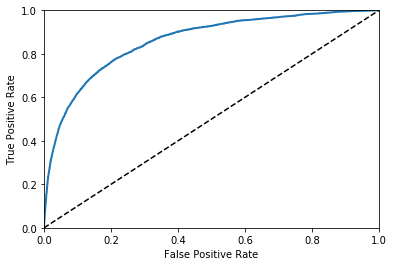

In [54]:
plot_roc_curve(fpr_rf, tpr_rf)
plt.show()

In [55]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.860070094444217

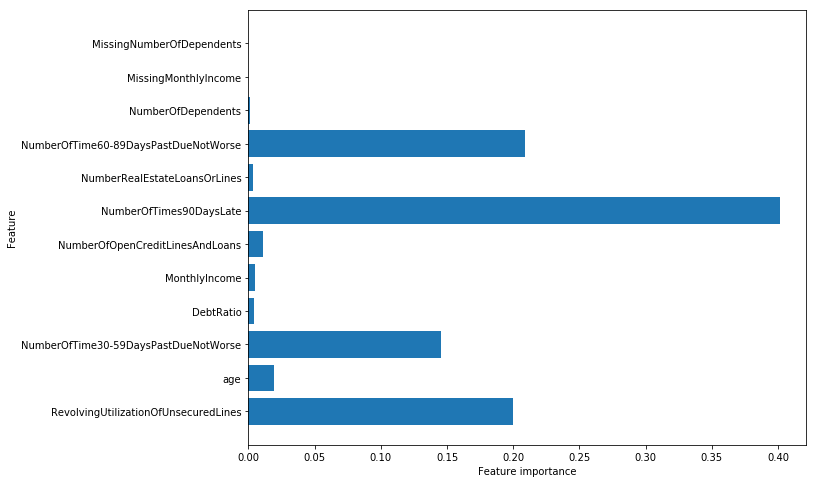

In [74]:
plot_feature_importances(rf)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"n_estimators": [10, 50, 100, 200, 300, 400, 500, 600, 700],
              "max_depth": [3, 5, 7, 9, 11, 13],
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "max_leaf_nodes": sp_randint(5, 25),
              "bootstrap": [True, False]
             }

In [52]:
rf = RandomForestClassifier()
rf_gs = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, n_jobs=-1, error_score='f1', n_iter=30)
rf_gs.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score='f1',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700], 'max_depth': [3, 5, 7, 9, 11, 13], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2937a908>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2937aa20>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2937aba8>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen

In [54]:
rf_gs.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 5,
 'max_leaf_nodes': 23,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'n_estimators': 50}

### Model comparison

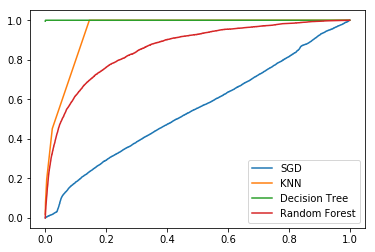

In [59]:
plt.plot(fpr_sgd, tpr_sgd, label="SGD")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
# plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right")
plt.show()

### Performance on Test set